In [1]:
source("/public/workspace/zhutao/scripts/colorpal.R")
raw_p2g_new <- read.table("/public/workspace/zhutao/encode/figure/fig3/input_df/gene/all_peak2gene_final.txt")
head(raw_p2g_new)

,V1,V2,V3,V4,V5,V6,V7
,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<int>
1,chrSy:11197-11484,ChrSy.fgenesh.gene.10,0.24779454,0.101600783,intra,Sy:51012,39672
2,chrSy:15905-16591,ChrSy.fgenesh.gene.10,-0.39549457,0.008014651,distal,Sy:51012,34764
3,chrSy:33572-34343,ChrSy.fgenesh.gene.10,-0.14703823,0.319699109,promoter,Sy:51012,17055
4,chrSy:34539-34934,ChrSy.fgenesh.gene.10,-0.02423001,0.860015145,promoter,Sy:51012,16276
5,chrSy:39081-39341,ChrSy.fgenesh.gene.10,0.28145933,0.062663157,distal,Sy:51012,11801
6,chrSy:40312-42171,ChrSy.fgenesh.gene.10,0.18147023,0.232094846,intra,Sy:51012,9771


In [2]:
p2g <- raw_p2g_new[raw_p2g_new$V3>=0.4 & abs(raw_p2g_new$V7)<= 20000,]
p2g$idx_atac <- sprintf("ATAC_%s",1:nrow(p2g))
p2g$idx_rna <- sprintf("RNA_%s",1:nrow(p2g))
head(p2g)

,V1,V2,V3,V4,V5,V6,V7,idx_atac,idx_rna
,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>
39,chrSy:39081-39341,ChrSy.fgenesh.gene.12,0.4674062,0.003415713,distal,Sy:58993,19782,ATAC_1,RNA_1
41,chrSy:44903-45158,ChrSy.fgenesh.gene.12,0.4667829,0.003461642,intra,Sy:58993,13963,ATAC_2,RNA_2
43,chrSy:61644-62351,ChrSy.fgenesh.gene.12,0.4850587,0.002324488,intra,Sy:58993,-3004,ATAC_3,RNA_3
44,chrSy:62718-63213,ChrSy.fgenesh.gene.12,0.4177861,0.009409245,intra,Sy:58993,-3972,ATAC_4,RNA_4
45,chrSy:63368-63843,ChrSy.fgenesh.gene.12,0.4479467,0.005143825,intra,Sy:58993,-4612,ATAC_5,RNA_5
46,chrSy:64165-64449,ChrSy.fgenesh.gene.12,0.4599053,0.004006997,distal,Sy:58993,-5314,ATAC_6,RNA_6


In [3]:
p2g_atac <- p2g[,c(1,8)]
rownames(p2g_atac) <- p2g_atac$idx_atac
head(p2g_atac)

,V1,idx_atac
,<chr>,<chr>
ATAC_1,chrSy:39081-39341,ATAC_1
ATAC_2,chrSy:44903-45158,ATAC_2
ATAC_3,chrSy:61644-62351,ATAC_3
ATAC_4,chrSy:62718-63213,ATAC_4
ATAC_5,chrSy:63368-63843,ATAC_5
ATAC_6,chrSy:64165-64449,ATAC_6


In [4]:
atac <- readRDS("/public/workspace/zhutao/encode/figure/fig3/input_df/ATAC_norm_quant.rds")
atac_mat <- merge(p2g_atac, atac, by.x="V1",by.y=0,all=F)
rownames(atac_mat) <- atac_mat$idx_atac
atac_mat <- atac_mat[,c(3:67)]
head(atac_mat)

,MH63_AM1,MH63_AM2,MH63_Callus,MH63_DBuds,MH63_Leaf,MH63_Sheath,MH63_Palea,MH63_NPN,MH63_Plumule,MH63_Radicle,⋯,ZS97_Panicle3,ZS97_Panicle4,MH63_Lemma,MH63_SAM2,MH63_Seed2,NIP_Palea,ZS97_Panicle1,ZS97_Panicle2,ZS97_Radicle,ZS97_SAM2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ATAC_1830,5.977280,5.286523,4.579487,5.862684,6.112953,6.749616,5.407847,5.428804,5.424993,4.660374,⋯,6.667058,6.565246,5.426773,5.535864,5.703379,5.723170,6.603514,6.776184,5.589509,6.351006
ATAC_1831,7.682569,8.961537,8.661562,8.570431,7.984289,8.900089,8.817807,9.324743,8.960112,9.476976,⋯,8.224294,8.541507,9.160273,8.473121,8.687349,8.865874,8.677266,8.268063,9.169432,8.913479
ATAC_1832,7.111136,8.171745,7.772889,8.339546,7.209010,8.676331,8.788792,9.552116,8.361146,9.023985,⋯,7.920127,7.414525,8.819163,7.874981,7.998975,8.598560,7.914612,7.581657,9.132402,7.663504
ATAC_1833,7.378722,6.626705,7.034424,6.614710,6.436017,6.183523,7.806476,8.313914,7.853073,8.059549,⋯,6.900135,6.631122,7.473029,7.345640,7.025559,7.174396,7.164450,7.351408,8.006815,7.316179
ATAC_1834,8.053885,7.376487,7.574221,7.822015,5.836337,7.110266,7.533507,9.188776,8.180512,8.953778,⋯,7.336337,6.644512,7.792495,7.456697,6.826356,7.226485,8.095237,8.185326,9.157175,6.869991
ATAC_1835,6.872791,7.575482,7.384882,7.545140,6.026062,7.879676,8.203756,8.942648,8.176173,9.131857,⋯,7.374513,6.937886,8.691796,7.345640,7.382919,7.643911,7.378590,7.559580,8.934718,6.959826


In [5]:
rowZscores <- function(m = NULL, min = -2, max = 2, limit = T){
  z <- sweep(m - rowMeans(m), 1, matrixStats::rowSds(m),`/`)
  if(limit){
    z[z > max] <- max
    z[z < min] <- min
  }
  return(z)
}

In [27]:
atac_mat <- readRDS("/public/workspace/zhutao/encode/figure/fig9/p2g/ATAC_p2g_matrix_final.rds")
head(atac_mat)

,NIP_AM1,NIP_AM2,NIP_Callus,NIP_DBuds,NIP_Leaf,NIP_Lemma,NIP_NPN,NIP_Palea,NIP_Panicle1,NIP_Panicle2,⋯,ZS97_Panicle4,ZS97_Pistil,ZS97_Plumule,ZS97_Radicle,ZS97_Root,ZS97_SAM1,ZS97_SAM2,ZS97_SAM3,ZS97_Seed2,ZS97_Stamen
ATAC_31479,1.709294,1.968630,-0.4025341,1.5188549,0.7653640,1.7781186,1.5173100,1.071331,0.4368393,0.8261830,⋯,-0.829030,0.20602667,-1.918577,-1.9278238,-0.1872031,-0.8146240,0.008941842,0.06005105,-1.7129915,-0.9569302
ATAC_34736,1.729719,1.667601,1.1505211,1.4651633,1.1317071,1.2975029,1.6788351,1.398099,1.0348064,0.3487934,⋯,-1.767091,0.11325987,-1.057074,-0.8329008,-1.8646973,-0.4274379,0.088297226,-0.23006693,-0.9378677,0.3441804
ATAC_34741,1.729719,1.667601,1.1505211,1.4651633,1.1317071,1.2975029,1.6788351,1.398099,1.0348064,0.3487934,⋯,-1.767091,0.11325987,-1.057074,-0.8329008,-1.8646973,-0.4274379,0.088297226,-0.23006693,-0.9378677,0.3441804
ATAC_34749,1.729719,1.667601,1.1505211,1.4651633,1.1317071,1.2975029,1.6788351,1.398099,1.0348064,0.3487934,⋯,-1.767091,0.11325987,-1.057074,-0.8329008,-1.8646973,-0.4274379,0.088297226,-0.23006693,-0.9378677,0.3441804
ATAC_43081,1.557643,1.778839,0.9953101,1.4247796,0.7560079,0.8822205,0.9674523,1.120363,0.7673201,0.5529450,⋯,-1.209436,0.03586902,-2.000000,-1.6956332,-1.6814119,-0.5593380,-0.210056917,-0.13941741,-0.7910029,0.1471980
ATAC_2816,1.504252,1.470583,0.4823339,0.9877379,0.8473617,1.4455966,1.7267498,1.249133,0.7620123,0.6388936,⋯,-1.130305,0.04162152,-1.837492,-1.7715813,-1.4339061,-0.1552919,-0.787125425,-0.06189334,-0.9556083,0.9049980


In [28]:
library(tidyverse)
group <- read.table("/public/workspace/zhutao/encode/figure/fig9/p2g/atac_rna_group.txt")
group <- group[,-c(1,3)]  %>% remove_rownames %>% column_to_rownames(var="V4")
head(group)

,V2
,<chr>
ATAC_1,cluster2
ATAC_10,cluster2
ATAC_100,cluster2
ATAC_1000,cluster4
ATAC_10000,cluster1
ATAC_10001,cluster1


Warning message:
“Row annotation has different order from matrix rows. Adjust the row
annotation based on row names of the matrix.”


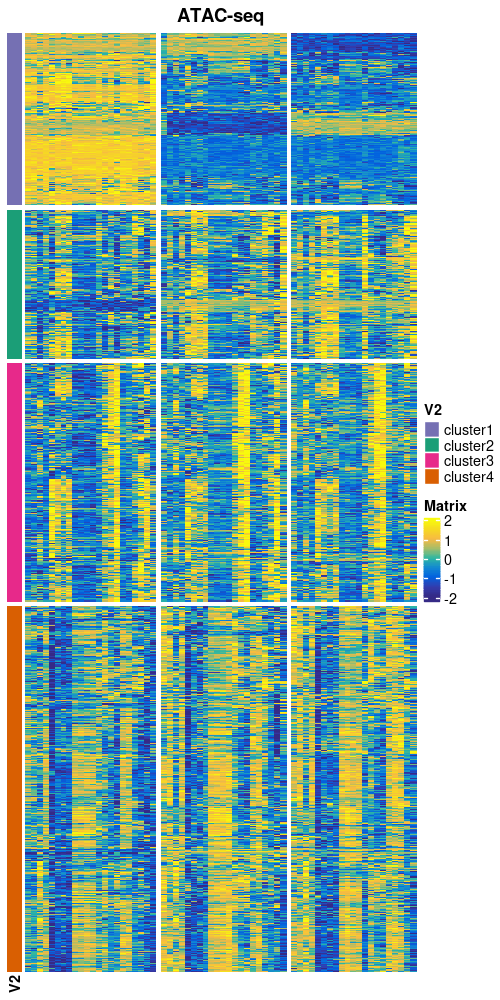

In [35]:
options(repr.plot.width = 5, repr.plot.height = 10, repr.plot.res = 100)
library(paletteer)
gcols <- setNames(as.character(paletteer_d("RColorBrewer::Dark2")[1:4]),unique(group$V2))
gcol <- list(V2=gcols)
ComplexHeatmap::pheatmap(atac_mat, show_rownames=F,show_colnames=F, cluster_row=F,cluster_col=F,border_color=NA,use_raster=F,annotation_colors =gcol,
                                annotation_row = group, gaps_row = cumsum(as.numeric(table(group$V2)))[1:3],gaps_col=c(22,43),
                              color=paletteContinuous(set = "blueYellow", n = 100),main="ATAC-seq")

Warning message:
“Row annotation has different order from matrix rows. Adjust the row
annotation based on row names of the matrix.”


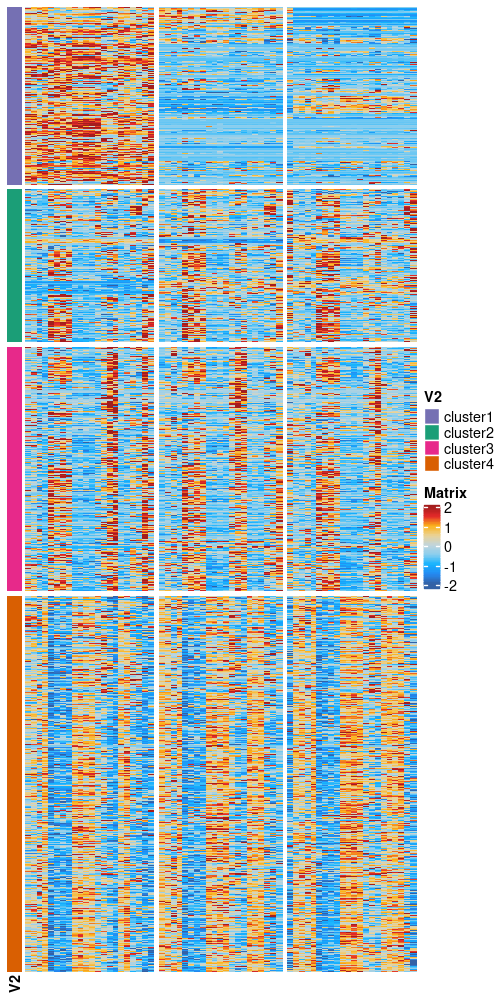

In [41]:
rna <- read.table("/public/workspace/zhutao/encode/figure/fig3/input_df/remove_low_exp_gene_log2.csv")
p2g_rna <- p2g[,c(2,8)]
rownames(p2g_rna) <- p2g_rna$idx_atac
p2g_rna_order <- p2g_rna[rownames(mat1), ]
rna_mat <- merge(p2g_rna_order, rna, by.x="V2",by.y=0,all=F)
rownames(rna_mat) <- rna_mat$idx_atac
rna_mat<- rna_mat[,c(3:67)]
rna_mat <- rna_mat[rownames(mat1),colnames(mat1)]
rna_mat <- rowZscores(as.matrix(rna_mat))

options(repr.plot.width = 5, repr.plot.height = 10, repr.plot.res = 100)
p2 <- ComplexHeatmap::pheatmap(rna_mat, show_rownames=F,show_colnames=F,cluster_row=F,cluster_col=F,border_color=NA,use_raster=F,
                                annotation_row = group, gaps_row = cumsum(as.numeric(table(group$V2)))[1:3],annotation_colors =gcol,
                               gaps_col=c(22,22+21),color=paletteContinuous(set = "solarExtra", n = 100))
p2

# Cluster Target Gene GO enrichment

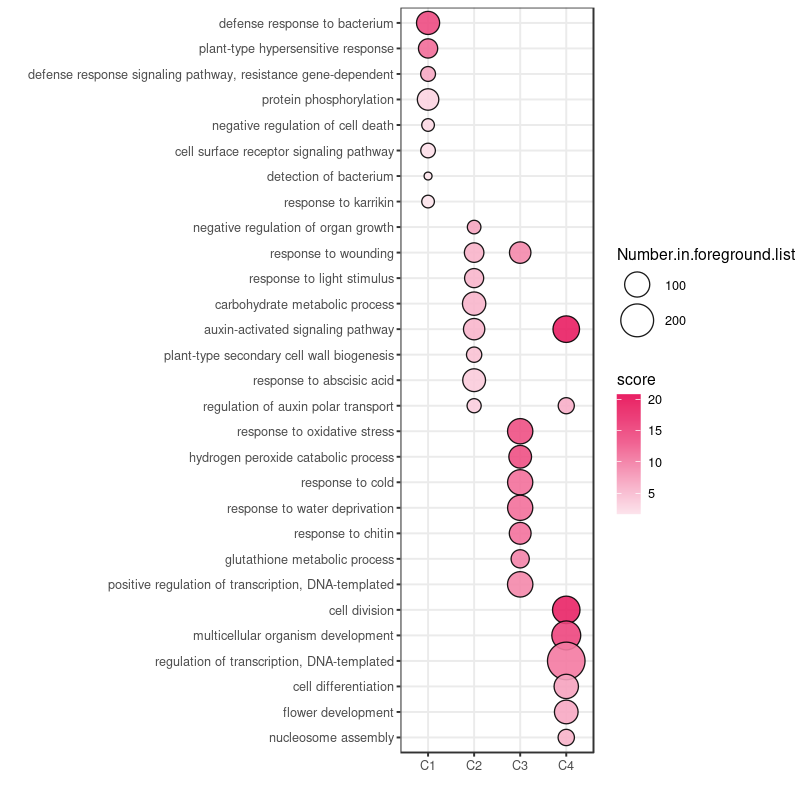

In [42]:
go <- read.table("/public/workspace/zhutao/encode/figure/fig9/p2g/NIP_MHZS_Cluster1_4_GO.csv",sep=',',head=T)
library(dplyr)
go$score <- -log10(go$FDR)
go <- go[go$Group=="biological_process",] %>% group_by(Sample) %>% slice_max(order_by = score, n = 8)
library(ggplot2)
library(ggpubr)
library(paletteer)
go$Description <- factor(go$Description, levels=rev(unique(go$Description)))
library(paletteer)
myPalette <- colorRampPalette(as.character(paletteer_d("RColorBrewer::OrRd")[2:6]))
options(repr.plot.width = 8, repr.plot.height = 8, repr.plot.res = 100)
p3 <- ggplot(go, aes(x=Sample, y=Description)) + geom_point(aes(size= Number.in.foreground.list, fill = score),shape=21,alpha=0.9)+
scale_fill_gradientn(colours =paletteer_d("ggsci::pink_material")[1:6])+theme_bw()+scale_size_continuous(range = c(2, 12))+
ylab('') +xlab("")
p3

# TE Analysis

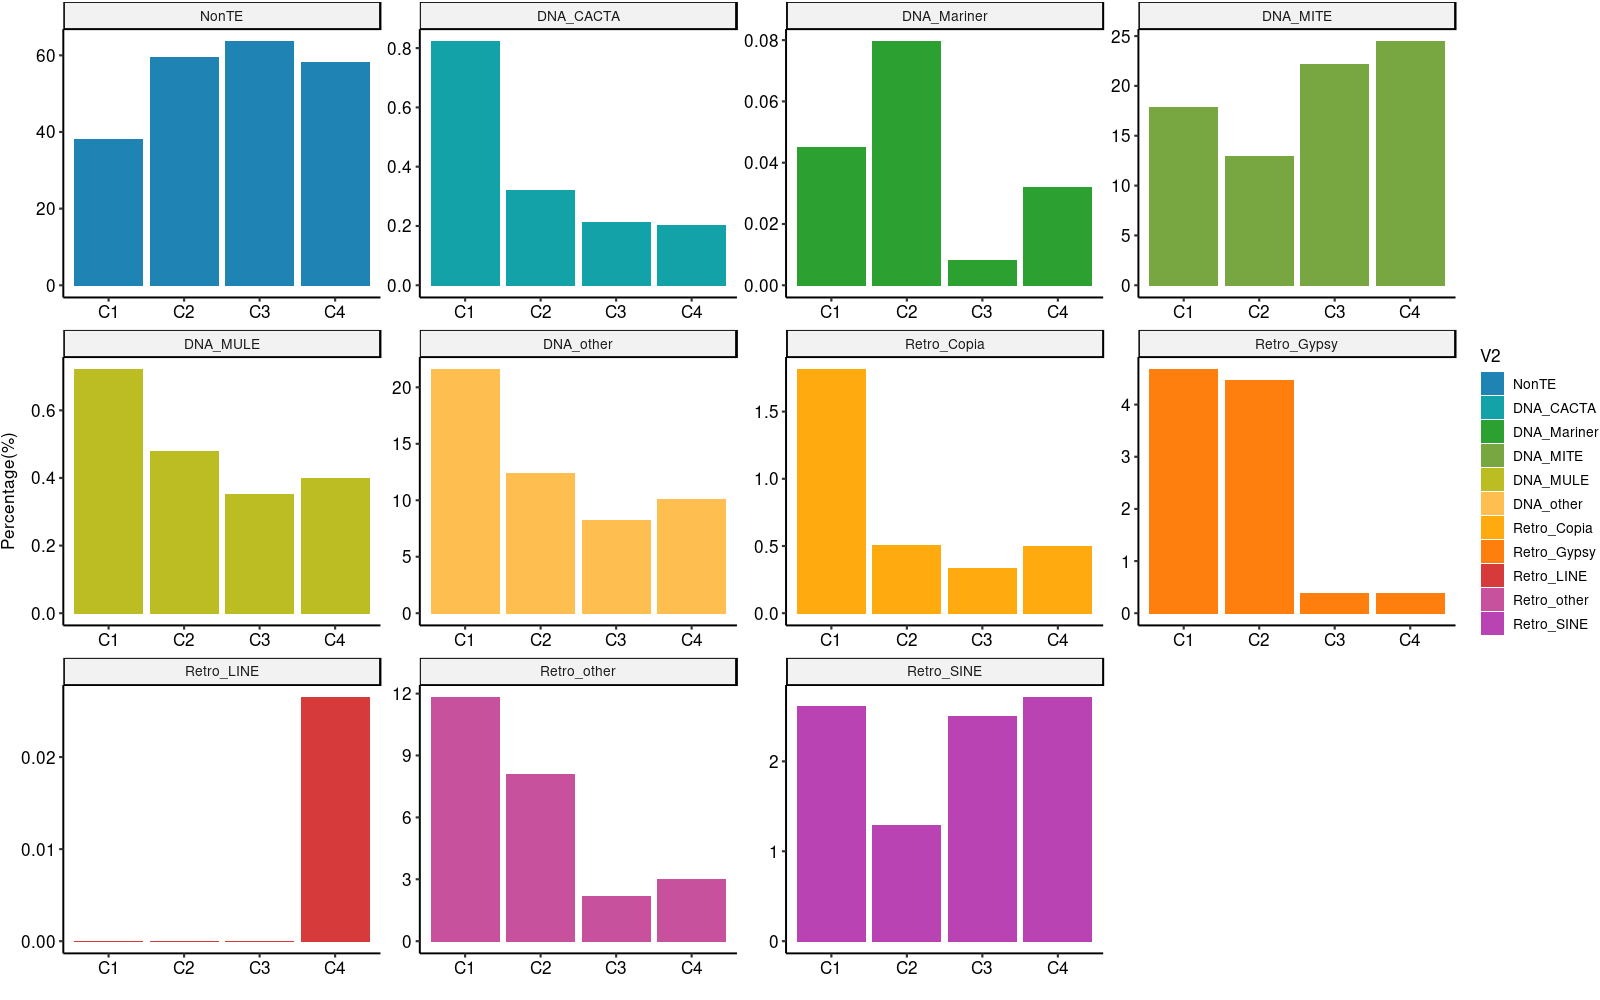

In [44]:
te <- read.table("/public/workspace/zhutao/encode/figure/fig9/p2g/te/intersect/all_cluster_te.overlap_1bp_num.txt")
nonte <- data.frame(V1=c("cluster1","cluster2","cluster3","cluster4"),V2=c("NonTE","NonTE","NonTE","NonTE"),V3=c(8872-5496,7537-3052,12264-4458,18868-7887))
te_res <- rbind(te,nonte)
te_df <- te_res %>% group_by(V1) %>% mutate(percent = V3/sum(V3))
te_df$V1 <- gsub("cluster","C",te_df$V1)
te_df$V2 <- factor(te_df$V2, levels=c("NonTE","DNA_CACTA","DNA_Mariner","DNA_MITE","DNA_MULE",
                                      "DNA_other","Retro_Copia","Retro_Gypsy","Retro_LINE","Retro_other","Retro_SINE"))

options(repr.plot.width = 16, repr.plot.height = 10, repr.plot.res = 100)
#cols <- setNames(rev(paletteer_d("ggsci::default_locuszoom"))[1:7],c("Balanced","NIP dominant","MH63 dominant","ZS97 dominant","NIP suppressed","MH63 suppressed","ZS97 suppressed"))
p4 <- ggplot(data=te_df, aes(x=V1, y=100*(te_df$percent), fill=V2)) +
geom_bar(stat="identity", position=position_dodge())+scale_fill_manual(values = paletteer_d("ggthemes::Classic_Cyclic"))+
 theme_pubr(base_size = 12, base_family = "", border = F, margin = F,legend = c("right"))+labs(x="",y="Percentage(%)")+facet_wrap( ~ V2,scales="free")
p4

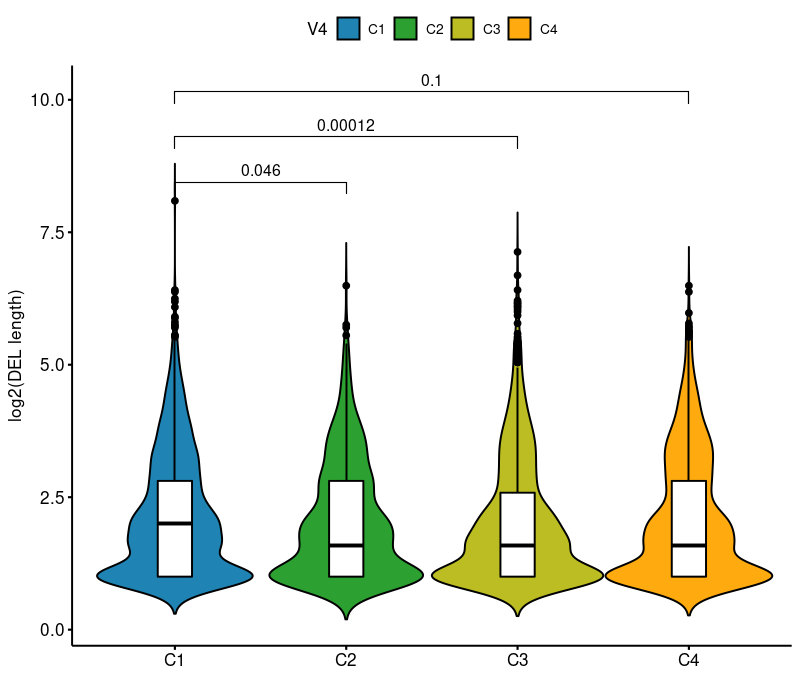

In [47]:
del <- read.table("/public/workspace/zhutao/encode/figure/fig9/p2g/sv/Cluster1_4_overlapped_Called_DEL.bed")
#del <- del[del$V8>=5,]
del$V9 <-log2(del$V8+1)
del$V4 <- gsub("cluster","C",del$V4)
my_comparisons <- list(c("C1","C2"),c("C1","C3"),c("C1","C4"))
options(repr.plot.width = 8, repr.plot.height = 7, repr.plot.res = 100)
my_comparisons <- list(c("C1","C2"),c("C1","C3"),c("C1","C4"))
p5 <- ggviolin(del, "V4", "V9", fill = "V4",
   palette =paletteer_d("ggthemes::Classic_Cyclic")[c(1,3,5,7)],
   add = "boxplot", add.params = list(fill = "white"))+stat_compare_means(comparisons = my_comparisons)+xlab("")+ylab("log2(DEL length)")
p5

Warning message:
“Removed 15 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 15 rows containing non-finite values (stat_signif).”


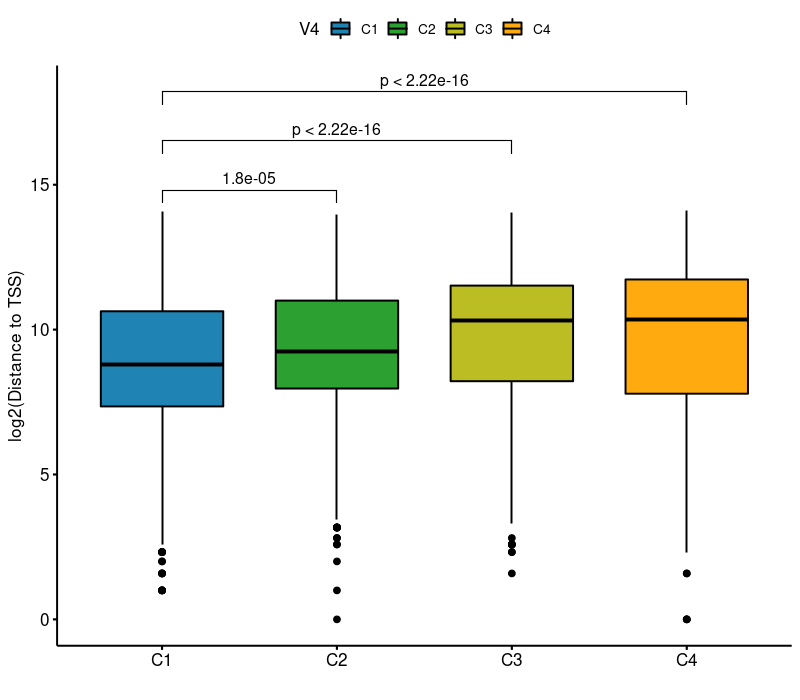

In [48]:
dis <- read.table("/public/workspace/zhutao/encode/figure/fig9/p2g/sv/sv_peak_closest_gene.txt")
dis$V4 <- gsub("cluster","C",dis$V4)
dis$dis <- log2(dis$V11)
dis$V4 <- factor(dis$V4, levels=c("C1","C2","C3","C4"))
my_comparisons <- list(c("C1","C2"),c("C1","C3"),c("C1","C4"))
p6 <- ggboxplot(dis, "V4", "dis", fill = "V4",
   palette =paletteer_d("ggthemes::Classic_Cyclic")[c(1,3,5,7)])+
stat_compare_means(comparisons = my_comparisons)+xlab("")+ylab("log2(Distance to TSS)")
p6

In [49]:
plotPeakGene <- function(peak,gene){
    library(ggplot2)
    library(ggpubr)
    library(dplyr)
    library(tidyr)
    tissue_col <- read.table("/public/workspace/zhutao/encode/figure/fig3/color.txt",comment.char = "", check.names = FALSE)
    col <- setNames(tissue_col$V2,tissue_col$V1)
    atac_paired_norm <- readRDS("/public/workspace/zhutao/encode/figure/fig3/input_df/ATAC_norm_quant.rds")
    rna_paired <- readRDS("/public/workspace/zhutao/encode/figure/fig3/input_df/RNA_norm_quant.rds")
    ss <- data.frame(ATAC=as.matrix(atac_paired_norm)[peak,],RNA=rna_paired[gene,])
    ss$sample <- rownames(ss)
    ss <- ss %>% separate(sample, c("Type", "Tissue"), "_")
    options(repr.plot.width = 6.5, repr.plot.height = 5, repr.plot.res = 100)
    pp <- ggplot(ss, aes(x=ATAC, y=RNA)) + 
        geom_point(aes(colour = Tissue,shape = Type))+
        geom_smooth(method=lm,color = "#F28E2B")+scale_color_manual(values=col)+
        theme_pubr(legend = c("right"))+ theme(panel.border = element_rect(colour = "black", fill=NA))+
        xlab('ATAC-seq  log2(CPM+1)') +ylab("RNA-seq  log2(TPM+1)")+ggtitle(sprintf("%s\n%s", gene,peak))
 return(pp)
}

`geom_smooth()` using formula 'y ~ x'



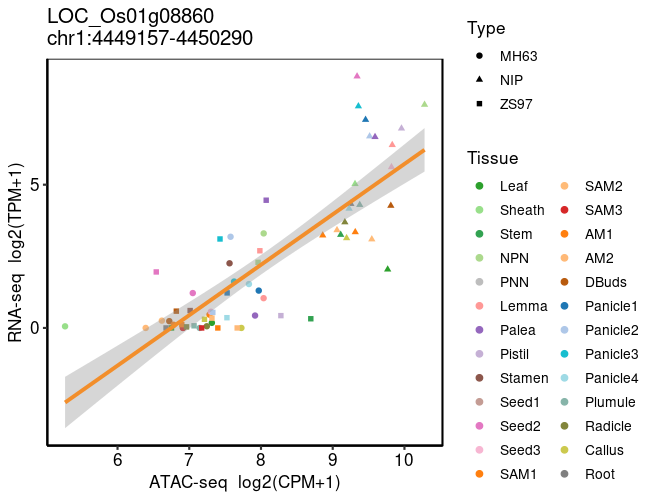

In [50]:
plotPeakGene("chr1:4449157-4450290","LOC_Os01g08860")

`geom_smooth()` using formula 'y ~ x'



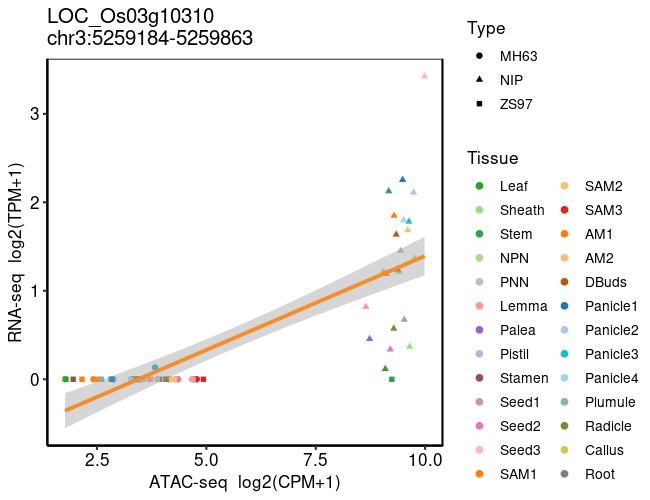

In [51]:
plotPeakGene("chr3:5259184-5259863","LOC_Os03g10310")